In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [2]:
data = pd.read_sql("""
                   SELECT rps.documentdate ::date
                       ,rps.saleprice :: numeric(10,2)
                       ,rps.propertytype 
                       ,rps.principaluse 
                       ,rps.saleinstrument :: int
                       ,rps.currentuseland 
                       ,rps.historicproperty
                       ,rps.salereason :: int
                       ,rps.propertyclass :: int 
                       ,SUBSTRING (rb.zipcode, 1,5) AS zipcode
                       ,rb.streettype
                       ,rb.stories
                       ,rb.buildinggrade :: int
                       ,rb.squarefeettotalliving :: int
                       ,rb.squarefeettotalbasement :: int
                       ,rb.squarefeetgarageattached
                       ,rb.squarefeetopenporch :: int
                       ,SquareFeetEnclosedPorch :: int
                       ,rb.squarefeetdeck :: int
                       ,rb.bedrooms :: int
                       ,rb.BathHalfCount :: int
                       ,rb.Bath3qtrCount :: int
                       ,rb.BathFullCount :: int
                       ,rb.FireplaceSingleStory 
                       ,rb.FireplaceMultipleStory 
                       ,rb.FireplaceFreeStanding 
                       ,rb.FireplaceAdditional 
                       ,rb.YearBuilt :: int
                       ,rb.YearRenovated :: int
                       ,rb.PercentComplete 
                       ,rb.Obsolescence 
                       ,rb.PercentNetCondition
                       ,rb.Condition 
                       ,p.township 
                       ,p.propertytype
                       ,p.districtname
                       ,p.levycode
                       ,p.lotsquarefootage
                       ,p.watersystem 
                       ,p.access 
                       ,p.topography 
                       ,p.ViewMtRanier 
                       ,p.ViewOlympics 
                       ,p.ViewCascades 
                       ,p.ViewTerritorial 
                       ,p.ViewSeattleSkyline 
                       ,p.ViewPugetSound
                       ,p.ViewLakeWashington 
                       ,p.ViewLakeSammamish 
                       ,p.ViewSmallLakeRiverCreek 
                       ,p.ViewOtherView 
                       ,p.WaterfrontLocation 
                       ,p.WaterfrontFootage 
                       ,p.WaterfrontBank 
                       ,p.WaterfrontPoorQualtiy 
                       ,p.WaterfrontRestrictedAccess 
                       ,p.WaterfrontAccessRights 
                       ,p.WaterfrontProximityInfluence
                       ,p.TidelandShoreland 
                       ,p.LotDepthFactopr 
                       ,p.TrafficNoise 
                       ,p.AirportNoise 
                       ,p.PowerLines 
                       ,p.OtherNuisances 
                FROM real_property_sales rps
                JOIN residential_building rb
                     ON rps.major = rb.major
                     AND rps.minor = rb.minor
                JOIN parcel p
                     ON p.major = rps.major
                     AND p.minor = rps.minor
                WHERE  (rps.propertytype = '12' OR rps.propertytype = '14' OR rps.propertytype = '18' OR rps.propertytype = '11')
                        AND (rps.principaluse = '2' OR rps.principaluse = '6')
                        AND (rps.documentdate > '2018-12-31' and rps.documentdate < '2020-01-01')
                        AND (rb.squarefeettotalliving  < 4500)
                        AND (rps.saleprice > 10.00 AND rps.saleprice < 2500000)
                        AND (rps.saleinstrument = '3' OR rps.saleinstrument = '2');
                """, conn)
data

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,2019-06-26,775000.0,11,6,3,N,N,1,8,98011,...,0,0,0,N,N,0.0,0,0,0,N
1,2019-07-01,1410000.0,11,6,3,N,N,1,8,,...,0,0,0,N,N,0.0,0,0,0,N
2,2019-06-25,460000.0,11,6,3,N,N,1,8,98168,...,0,0,0,N,N,0.0,0,1,0,N
3,2019-10-30,484000.0,11,6,3,N,N,1,8,98038,...,0,0,0,N,N,0.0,0,2,0,N
4,2019-06-12,1000000.0,11,6,3,N,N,1,8,98006,...,0,0,0,N,N,0.0,0,1,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,2019-05-09,830000.0,11,6,3,N,N,1,8,98019,...,0,0,0,N,N,0.0,0,0,0,N
16382,2019-08-02,1835000.0,11,6,3,N,N,1,8,98008,...,0,0,0,N,N,0.0,0,0,0,N
16383,2019-11-07,545000.0,11,6,3,N,N,1,8,,...,0,0,0,N,N,0.0,0,0,0,N
16384,2019-08-20,1320000.0,11,6,3,N,N,1,8,98105,...,0,0,0,N,N,0.0,0,0,0,N


In [3]:
data.to_csv('../asp_original')

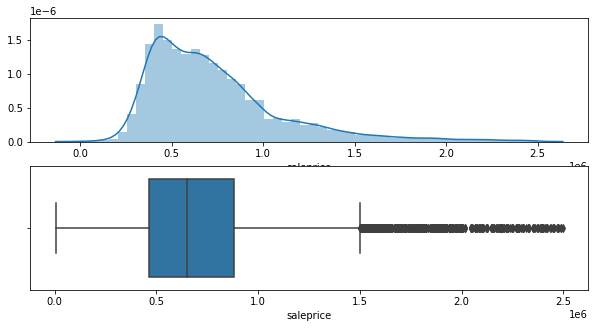

In [4]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(data.saleprice, ax = ax[0])
sns.boxplot(data.saleprice, ax= ax[1]);

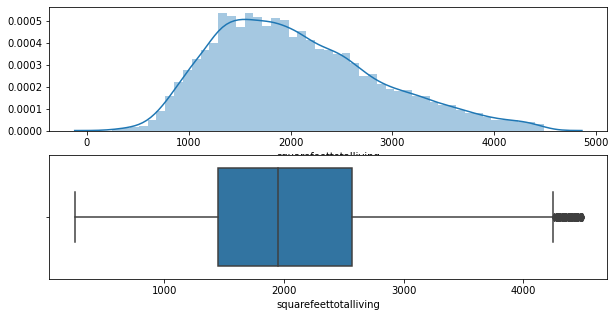

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(data.squarefeettotalliving, ax = ax[0])
sns.boxplot(data.squarefeettotalliving, ax= ax[1]);

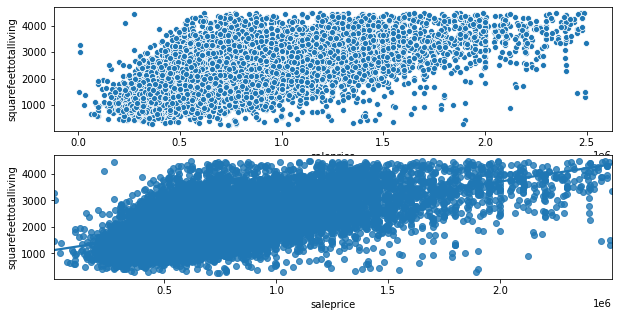

In [6]:
x = data.saleprice
y = data.squarefeettotalliving
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.scatterplot(x,y, ax = ax [0])
sns.regplot(x,y, ax = ax [1])

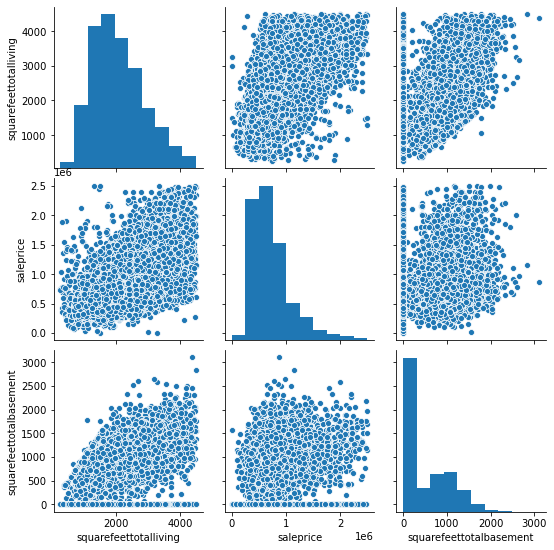

In [7]:
sns.pairplot(data = data[['squarefeettotalliving','saleprice','squarefeettotalbasement']]);

In [8]:
data.corr()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,stories,buildinggrade,squarefeettotalliving,squarefeettotalbasement,...,percentcomplete,obsolescence,percentnetcondition,condition,township,lotsquarefootage,watersystem,access,topography,lotdepthfactopr
saleprice,1.000000,-0.004782,NaN,0.016737,-0.014754,-0.028483,0.289080,0.614864,0.591561,0.223131,...,0.000532,-0.005514,-0.009807,-0.043271,0.460670,0.058673,0.013870,-0.053657,0.137275,0.082897
propertytype,-0.004782,1.000000,NaN,0.003180,-0.000711,-0.011344,0.055687,-0.002094,-0.043739,0.000928,...,0.016135,-0.004412,-0.001275,-0.045351,0.031654,-0.026824,0.014283,-0.017974,-0.014802,-0.002481
principaluse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saleinstrument,0.016737,0.003180,NaN,1.000000,-0.223477,-0.003504,0.006751,0.008975,-0.000976,0.001241,...,0.002269,-0.022211,0.000490,-0.009959,0.009347,-0.014569,-0.005488,0.005325,0.009867,0.002202
salereason,-0.014754,-0.000711,NaN,-0.223477,1.000000,0.000783,0.006112,-0.011848,-0.006514,-0.006510,...,-0.000507,-0.000379,-0.000109,-0.005463,-0.008352,0.006717,0.001226,0.001854,-0.002205,-0.000492
propertyclass,-0.028483,-0.011344,NaN,-0.003504,0.000783,1.000000,-0.106772,-0.031052,-0.008549,0.012013,...,-0.384080,0.004861,0.001405,0.070099,-0.070316,0.015864,-0.019547,-0.018996,0.023586,0.006314
stories,0.289080,0.055687,NaN,0.006751,0.006112,-0.106772,1.000000,0.444259,0.339493,-0.263086,...,0.079406,-0.011258,-0.005245,-0.289139,0.095137,-0.040373,0.020757,0.002857,-0.010640,-0.011341
buildinggrade,0.614864,-0.002094,NaN,0.008975,-0.011848,-0.031052,0.444259,1.000000,0.706516,0.040539,...,0.052044,-0.023825,-0.027962,-0.209379,0.147895,0.066511,0.003678,-0.069716,0.095043,0.001987
squarefeettotalliving,0.591561,-0.043739,NaN,-0.000976,-0.006514,-0.008549,0.339493,0.706516,1.000000,0.245481,...,0.038844,-0.011836,-0.019045,-0.108040,0.057733,0.126546,-0.043141,-0.074387,0.124208,-0.002206
squarefeettotalbasement,0.223131,0.000928,NaN,0.001241,-0.006510,0.012013,-0.263086,0.040539,0.245481,1.000000,...,-0.019220,0.015429,0.005548,0.120223,0.168485,-0.009630,0.025521,0.001119,0.151367,0.018083


In [9]:
from statsmodels.formula.api import ols
fsm_df = data[['squarefeettotalliving','saleprice',]]
fsm_df.head()

,squarefeettotalliving,saleprice
0,2550,775000.0
1,3170,1410000.0
2,1890,460000.0
3,1620,484000.0
4,2710,1000000.0


In [10]:
formula = 'squarefeettotalliving~saleprice'
fsm = ols(formula=formula, data=fsm_df).fit()

In [11]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     squarefeettotalliving   R-squared:                       0.350
Model:                               OLS   Adj. R-squared:                  0.350
Method:                    Least Squares   F-statistic:                     8820.
Date:                   Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                           15:09:48   Log-Likelihood:            -1.2951e+05
No. Observations:                  16386   AIC:                         2.590e+05
Df Residuals:                      16384   BIC:                         2.590e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1113.6493     11.375     97.906      0.000    1091.354    1135.945
saleprice      0.0013   1.38e-05     93.915      0.000       0.001       0.001
==============================================================================
Omnibus:                      438.918   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.152
Skew:                           0.360   Prob(JB):                    3.72e-112
Kurtosis:                       3.483   Cond. No.                     1.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.34994479174514526
----------
Beta values of FSM:
Intercept    1113.649314
saleprice       0.001299
dtype: float64


In [13]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0177421557016857
Rainbow p-value: 0.2130601658362761


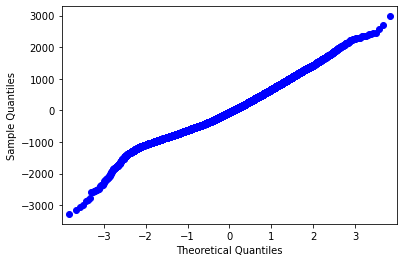

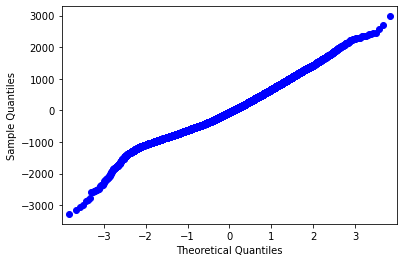

In [14]:
fsm_resids = fsm.resid
import statsmodels.api as sm
sm.qqplot(fsm_resids)

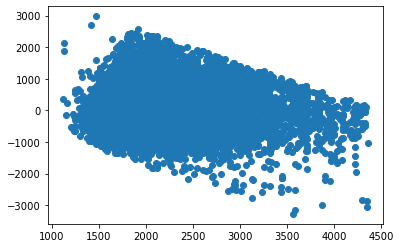

In [15]:
y_hat = fsm.predict()
plt.scatter(y_hat,fsm_resids)
plt.show()

In [16]:
data2 = pd.read_sql("""
            SELECT DISTINCT
                   rps.major
                   ,rps.minor
                   ,rps.documentdate :: date
                   ,rps.saleprice
                   ,rb.zipcode
                   ,rb.stories
                   ,rb.buildinggrade
                   ,rb.squarefeettotalliving
                   ,rb.squarefeettotalbasement
                   ,rb.squarefeetopenporch
                   ,rb.squarefeetenclosedporch
                   ,rb.squarefeetdeck
                   ,p.township
                   ,p.districtname
                   ,p.lotsquarefootage
                   ,p.streetsurface
                   ,p.restrictivesizeshape
                   ,p.inadequateparking
                   ,p.percentunusable
                   ,p.waterfrontlocation
                   ,p.trafficnoise
                   ,p.airportnoise
                   ,p.powerlines
                   ,p.othernuisances
            FROM real_property_sales rps
            JOIN residential_building rb 
                 ON rb.major = rps.major
                 AND rb.minor = rps.minor
            JOIN parcel p 
                 ON p.major = rps.major
                 AND p.minor = rps.minor
            WHERE (rps.propertytype = '12' OR rps.propertytype = '14' OR rps.propertytype = '18' OR rps.propertytype = '11')
                        AND (rps.principaluse = '2' OR rps.principaluse = '6')
                        AND (rps.documentdate > '2018-12-31' and rps.documentdate < '2020-01-01')
                        AND (rb.squarefeettotalliving > 800 AND rb.squarefeettotalliving  < 4500)
                        AND (rps.saleprice > 10.00 AND rps.saleprice < 2500000)
                   """,conn)
data2

,major,minor,documentdate,saleprice,zipcode,stories,buildinggrade,squarefeettotalliving,squarefeettotalbasement,squarefeetopenporch,...,lotsquarefootage,streetsurface,restrictivesizeshape,inadequateparking,percentunusable,waterfrontlocation,trafficnoise,airportnoise,powerlines,othernuisances
0,000100,0042,2019-10-29,485500.0,,2.0,7.0,2134.0,0.0,244.0,...,6002.0,1.0,0.0,2.0,0.0,0,0,0,0,N
1,000100,0067,2019-03-18,358308.0,98002,1.0,8.0,2240.0,1340.0,170.0,...,17400.0,1.0,0.0,2.0,0.0,0,0,0,0,N
2,000120,0008,2019-05-17,850000.0,98166,1.0,8.0,3500.0,1750.0,0.0,...,24142.0,1.0,0.0,0.0,0.0,0,0,0,0,N
3,000180,0144,2019-12-30,187720.0,98108,1.0,7.0,2150.0,1350.0,0.0,...,6500.0,1.0,0.0,2.0,0.0,0,0,0,0,N
4,000300,0086,2019-06-18,350000.0,98168,1.0,6.0,1240.0,750.0,0.0,...,9200.0,2.0,0.0,2.0,0.0,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16004,984230,0580,2019-03-01,608220.0,98126,1.0,7.0,1570.0,910.0,0.0,...,7717.0,1.0,0.0,0.0,0.0,0,0,0,0,N
16005,984230,0625,2019-09-25,620000.0,98126,1.0,7.0,1010.0,0.0,0.0,...,4112.0,1.0,0.0,0.0,0.0,0,0,0,0,N
16006,984230,0690,2019-07-22,849950.0,,2.0,9.0,2620.0,970.0,390.0,...,4149.0,1.0,0.0,0.0,0.0,0,0,0,0,N
16007,990000,0470,2019-06-06,1275000.0,98166,3.0,9.0,3830.0,0.0,130.0,...,6182.0,1.0,0.0,2.0,0.0,0,0,1,0,N


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16009 entries, 0 to 16008
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   major                    16009 non-null  object 
 1   minor                    16009 non-null  object 
 2   documentdate             16009 non-null  object 
 3   saleprice                16009 non-null  float64
 4   zipcode                  16009 non-null  object 
 5   stories                  16009 non-null  float64
 6   buildinggrade            16009 non-null  float64
 7   squarefeettotalliving    16009 non-null  float64
 8   squarefeettotalbasement  16009 non-null  float64
 9   squarefeetopenporch      16009 non-null  float64
 10  squarefeetenclosedporch  16009 non-null  float64
 11  squarefeetdeck           16009 non-null  float64
 12  township                 16009 non-null  float64
 13  districtname             16009 non-null  object 
 14  lotsquarefootage      

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16386 entries, 0 to 16385
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   documentdate                  16386 non-null  object 
 1   saleprice                     16386 non-null  float64
 2   propertytype                  16386 non-null  int64  
 3   principaluse                  16386 non-null  int64  
 4   saleinstrument                16386 non-null  int64  
 5   currentuseland                16386 non-null  object 
 6   historicproperty              16386 non-null  object 
 7   salereason                    16386 non-null  int64  
 8   propertyclass                 16386 non-null  int64  
 9   zipcode                       16386 non-null  object 
 10  streettype                    16386 non-null  object 
 11  stories                       16386 non-null  float64
 12  buildinggrade                 16386 non-null  int64  
 13  s

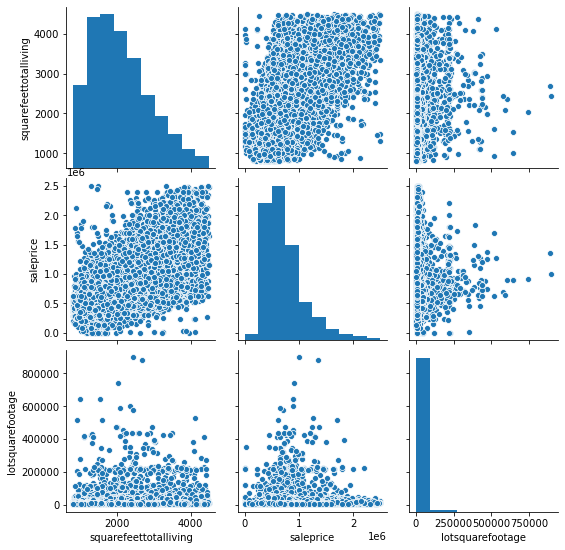

In [19]:
sns.pairplot(data = data2[['squarefeettotalliving','saleprice','lotsquarefootage']]);